## CAPM Analysis: Calculating stock Beta as a Regression 

Capital Asset Pricing Model (CAPM) is an extension of the Markowitz’s Modern Portfolio Theory. 

This model was developed by the independent works of William Sharpe, Jack Treynor, Jan Mossin, and John Lintner who built on the idea of diversification as introduced by the works of Harry Markowitz.

CAPM attempts to prices securities by examining **the relationship that exists between expected returns and risk**. 

The model implies that investors always combine two types of assets or securities; a risk-free asset and a risky asset in the form of a market portfolio of various assets.


CAPM further posits that investors **expect to be rewarded** for holding these risky assets according to the risk inherited for holding on to such assets.

In [28]:
# import image module
from IPython.display import Image

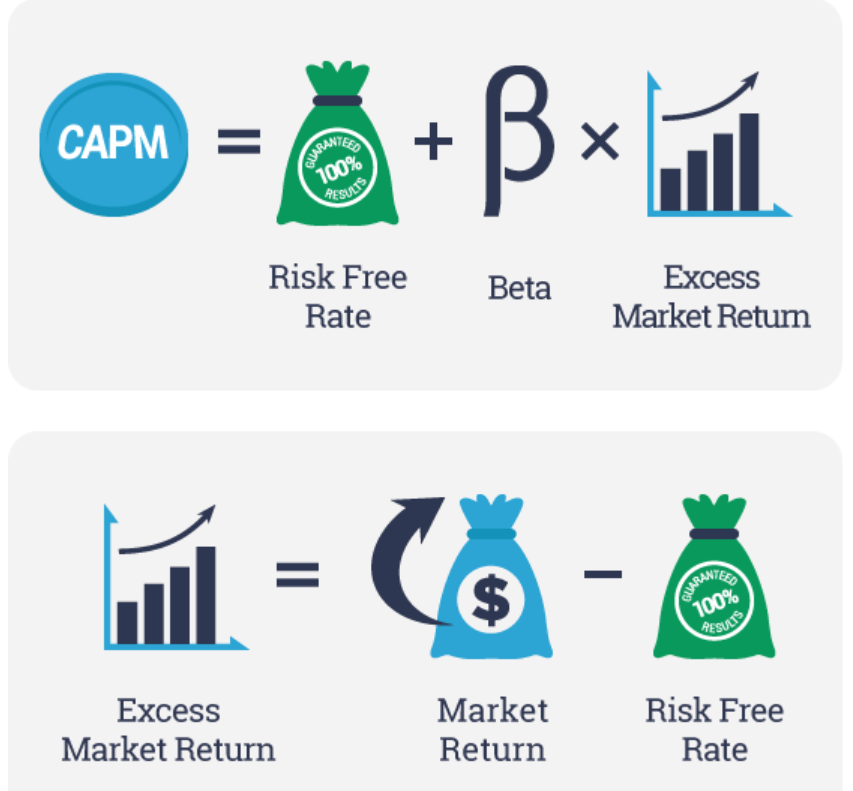

In [29]:
# get the image
Image("CAPMimage.png", width= 600, height=600)

The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). 

* How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). 

* What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow?


The formula for calculating Beta of a stock is:


$ \beta = \frac{cov(r_s,r_b)}{\sigma_{rb}^2}  $

### Interpretation of a Beta result:

A stock with a beta of:

* **zero**. Indicates no correlation with the chosen benchmark (e.g. NASDAQ index)

* **one**. Indicates a stock has the same volatility as the market
* **more than one**. Indicates a stock that’s more volatile than its benchmark (1.5 is 50% more volatile than the benchmark)
* **Less than one** is less volatile than the benchmark

In [1]:
from scipy import stats
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

C:\Users\palmona1\anaconda3\envs\Case 41\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
!pip install pandas_datareader 

In [2]:
import pandas_datareader as web 

In [3]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2021,1,1)

In [8]:
df_spy = web.DataReader('SPY','yahoo',start, end)
df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,201.029999,198.589996,200.490005,201.020004,222353500.0,178.051315
2016-01-05,201.899994,200.050003,201.399994,201.360001,110845800.0,178.352448
2016-01-06,200.059998,197.600006,198.339996,198.820007,152112600.0,176.102646
2016-01-07,197.440002,193.589996,195.330002,194.050003,213436100.0,171.877670
2016-01-08,195.850006,191.580002,195.190002,191.919998,209817200.0,169.991043


In [16]:
df_ts = web.DataReader('TSLA', 'yahoo',start,end)
df_ts.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,222.029999,213.666672,214.330002,220.589996,68596800.0,220.589996
2020-12-28,227.133331,220.266663,224.836670,221.229996,96835800.0,221.229996
2020-12-29,223.300003,218.333328,220.333328,221.996674,68732400.0,221.996674
2020-12-30,232.199997,222.786667,224.000000,231.593338,128538000.0,231.593338
2020-12-31,239.573334,230.373337,233.330002,235.223328,148949700.0,235.223328


In [9]:
monthly_prices = pd.concat([df_fb['Close'], df_spy['Close']], axis=1)
monthly_prices.columns = ['TSLA', 'SPY']

<AxesSubplot:xlabel='Date'>

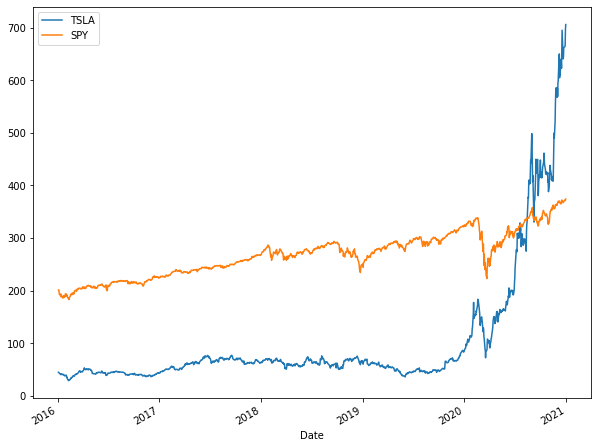

In [10]:
monthly_prices.plot(label = 'TSLA', figsize=(10,8))

In [11]:
monthly_prices.head()

,TSLA,SPY
Date,,
2016-01-04,44.681999,201.020004
2016-01-05,44.686001,201.360001
2016-01-06,43.807999,198.820007
2016-01-07,43.130001,194.050003
2016-01-08,42.200001,191.919998


In [13]:
df_fb['Cumu'] = monthly_prices['TSLA']/monthly_prices['TSLA'].iloc[0]


In [14]:
df_spy['Cumu'] = monthly_prices['SPY']/monthly_prices['SPY'].iloc[0]

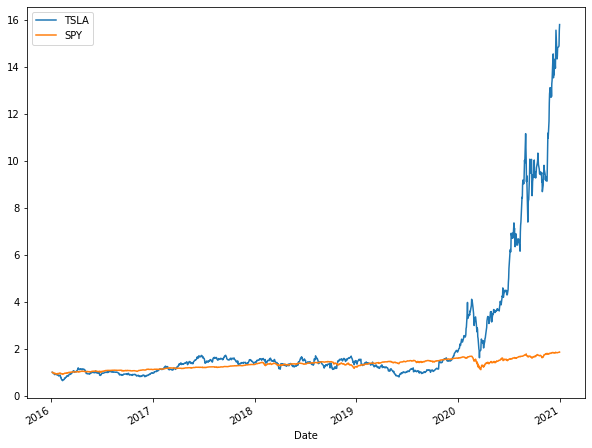

In [15]:
df_fb['Cumu'].plot(label = 'TSLA', figsize=(10,8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

In [16]:
# check the head of the dataframe
print(monthly_prices.head())

                 TSLA         SPY
Date                             
2016-01-04  44.681999  201.020004
2016-01-05  44.686001  201.360001
2016-01-06  43.807999  198.820007
2016-01-07  43.130001  194.050003
2016-01-08  42.200001  191.919998


In [17]:
# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)

In [18]:
# split dependent and independent variable
X = clean_monthly_returns['SPY']
y = clean_monthly_returns['TSLA']

In [19]:
# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     267.5
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.16e-54
Time:                        16:08:22   Log-Likelihood:                 2504.9
No. Observations:                1258   AIC:                            -5006.
Df Residuals:                    1256   BIC:                            -4995.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      2.287      0.0

El coefi

In [20]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print(slope)

1.278681028897211


In [21]:
r_value

0.41903616977356783

In [22]:
r_value**2

0.17559131157850236

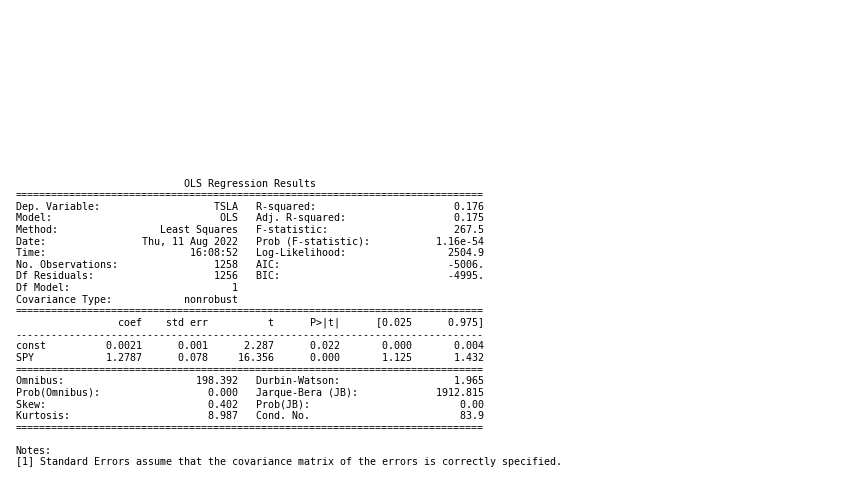

In [23]:
# save OLS Regression Results as a PNG
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')